In [79]:
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw , Descriptors, AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit.Chem.rdmolops import  PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect



In [80]:
df = pd.read_csv('/Users/samuelsetsofia/dev/DTI/BIOSNAP.csv')
df.head()

,SMILES,Target Sequence,Label,sFunction,1,2,3,4,5,6,...,200,201,202,203,204,205,206,207,208,209
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,[OUTPUT] This enzyme may degrade cohesive stru...,4.356094,4.356094,0.709426,0.709426,0.759604,239.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,[OUTPUT] Retinoic acid receptors bind to their...,10.534005,10.534005,0.259688,-0.912324,0.529573,300.442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,[OUTPUT] Catalyzes reduction of carbonyl-conta...,15.171732,15.171732,0.028414,-2.274490,0.195690,778.947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,NaN,10.288871,10.288871,0.207327,-0.628034,0.349961,406.482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,[OUTPUT] The regulatory subunit of the KCNMA1 ...,11.124475,11.124475,0.130320,-0.296192,0.484554,399.498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df = df.drop(df.columns[3:], axis=1)
df

,SMILES,Target Sequence,Label
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0
...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SMILES           19234 non-null  object
 1   Target Sequence  19234 non-null  object
 2   Label            19234 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 450.9+ KB


In [107]:
df.dropna(inplace=  True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19234 entries, 0 to 19233
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SMILES           19234 non-null  object
 1   Target Sequence  19234 non-null  object
 2   Label            19234 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 450.9+ KB


In [53]:
df['SMILES'].head()

0                      CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1
1      C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O
2    [H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...
3    COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2
4    [H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...
Name: SMILES, dtype: object

[00:18:44] Unusual charge on atom 0 number of radical electrons set to zero
[00:18:45] Unusual charge on atom 0 number of radical electrons set to zero


,SMILES,Target Sequence,Label,mol_obj
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,
...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,

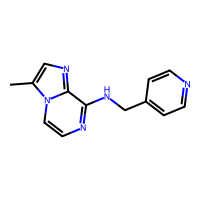
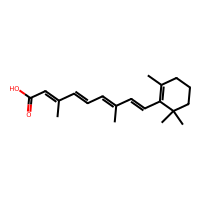
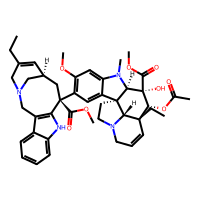
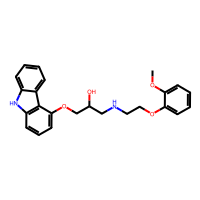
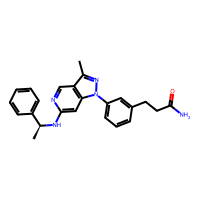
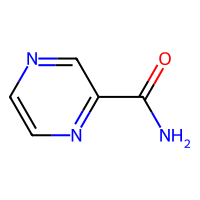
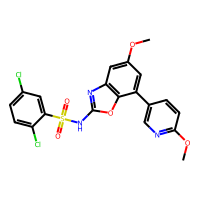
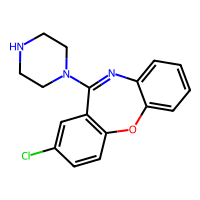
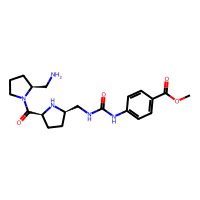
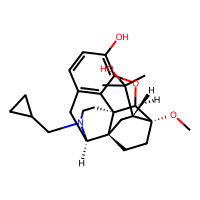

In [108]:
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES','mol_obj')
df

In [56]:
df_mf = []
for mol in df['mol_obj']:
    mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits= 512)
    arr = np.zeros((0,), dtype=np.int8)
    #convert the rdkit to vectors
    DataStructs.ConvertToNumpyArray(mf_bitvector, arr)
    df_mf.append(arr)

    MF = pd.concat([df, pd.DataFrame(df_mf)], axis=1)

[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerator
[00:18:53] DEPRECATION WARNING: please use MorganGenerat

In [100]:
MF

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,502,503,504,505,506,507,508,509,510,511
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x53a267d80>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x53aab0580>,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x53aab0660>,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x53aab06d0>,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x53aab07b0>,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,<rdkit.Chem.rdchem.Mol object at 0x556ceadc0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,<rdkit.Chem.rdchem.Mol object at 0x556ceae30>,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,<rdkit.Chem.rdchem.Mol object at 0x556ceaea0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,<rdkit.Chem.rdchem.Mol object at 0x556ceaf10>,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# create an empty list
df_maccs = []

# run a for loop to iterate through each molecule
for mol in df['mol_obj']:
# generate bitvector object
  maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)
# create an empty array
  arr = np.zeros((0,), dtype=np.int8)
# convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(maccs_bitvector,arr)
# append the array to the empty list
  df_maccs.append(arr)

MACCS = pd.concat([df, pd.DataFrame(df_maccs)], axis=1)

In [99]:
MACCS


,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,157,158,159,160,161,162,163,164,165,166
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x53aab05f0>,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x3379ef5a0>,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x3379ef1b0>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x3379ef220>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x3379ef290>,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b58c0>,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b5930>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b59a0>,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b5a10>,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [77]:
# create an empty list
df_apf = []

# run a for loop to iterate through each molecule
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

for mol in df['mol_obj']:
  apf_bitvector = apgen.GetFingerprint(mol)


# convert the RDKit explicit vectors into numpy arrays
  arr = np.array(apf_bitvector)
  df_apf.append(arr)

APF = pd.concat([df, pd.DataFrame(df_apf)], axis=1)

In [98]:
APF

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x53aab05f0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x3379ef5a0>,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x3379ef1b0>,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x3379ef220>,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x3379ef290>,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b58c0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b5930>,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b59a0>,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,<rdkit.Chem.rdchem.Mol object at 0x3361b5a10>,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [109]:
df_ttf = []
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
for mol in df['mol_obj']:
  ttf_bitvector = ttgen.GetFingerprint(mol)

  # convert the RDKit explicit vectors into numpy arrays
  arr = np.array(ttf_bitvector)
  df_ttf.append(arr)

TTF = pd.concat([df, pd.DataFrame(df_ttf)], axis=1)
     

In [110]:
TTF.head()

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7f1b0>,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x334a7c510>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7e180>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x334a7ef10>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7ef80>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_pf = []
for mol in df['mol_obj']:
  pf_bitvector = PatternFingerprint(mol)
  arr = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(pf_bitvector,arr)
  df_pf.append(arr)

PF = pd.concat([df, pd.DataFrame(df_pf)], axis=1)

In [112]:
PF.head()

,SMILES,Target Sequence,Label,mol_obj,0,1,2,3,4,5,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7f1b0>,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,<rdkit.Chem.rdchem.Mol object at 0x334a7c510>,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7e180>,0,1,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,<rdkit.Chem.rdchem.Mol object at 0x334a7ef10>,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,<rdkit.Chem.rdchem.Mol object at 0x334a7ef80>,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


In [59]:
# Define the amino acid alphabet and one-hot encoding mapping
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode_sequence(seq):
    # Initialize zero matrix for the sequence length x 20 amino acids
    ohe = np.zeros((len(seq), len(amino_acids)), dtype=int)
    for i, aa in enumerate(seq):
        if aa in aa_to_int:
            ohe[i, aa_to_int[aa]] = 1
    return ohe.flatten()  # Flatten the array to make it 1D for each protein

# Apply one-hot encoding to each sequence and store in new column
df['Protein_OHE'] = df['Target Sequence'].apply(one_hot_encode_sequence)

# Display the first few rows of the DataFrame with the new column
print(df[['Target Sequence', 'Protein_OHE']].head())

                                     Target Sequence  \
0  MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...   
1  MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...   
2  MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...   
3  MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...   
4  MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...   

                                         Protein_OHE  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  


In [103]:
# np.set_printoptions(threshold=np.inf)

# # Display the full content of the first few one-hot encoded arrays
# print(df['Protein_OHE'].iloc[1]) 

In [104]:
df

,SMILES,Target Sequence,Label,sFunction,1,2,3,4,5,6,...,200,201,202,203,204,205,206,207,208,209
0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0,[OUTPUT] This enzyme may degrade cohesive stru...,4.356094,4.356094,0.709426,0.709426,0.759604,239.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...,1,[OUTPUT] Retinoic acid receptors bind to their...,10.534005,10.534005,0.259688,-0.912324,0.529573,300.442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...,0,[OUTPUT] Catalyzes reduction of carbonyl-conta...,15.171732,15.171732,0.028414,-2.274490,0.195690,778.947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...,1,NaN,10.288871,10.288871,0.207327,-0.628034,0.349961,406.482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...,0,[OUTPUT] The regulatory subunit of the KCNMA1 ...,11.124475,11.124475,0.130320,-0.296192,0.484554,399.498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,NC(=O)C1=NC=CN=C1,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,1,[OUTPUT] A cytochrome P450 monooxygenase invol...,10.320648,10.320648,0.192130,-0.552685,0.550757,123.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19230,COC1=CC2=C(OC(NS(=O)(=O)C3=CC(Cl)=CC=C3Cl)=N2)...,MADQAPFDTDVNTLTRFVMEEGRKARGTGELTQLLNSLCTAVKAIS...,1,[OUTPUT] Catalyzes the hydrolysis of fructose ...,12.797225,12.797225,0.013589,-4.099092,0.413630,480.329,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19231,ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1,MVFLSGNASDSSNCTQPPAPVNISKAILLGVILGGLILFGVLGNIL...,1,[OUTPUT] The alpha-adrenergic receptor mediate...,6.204052,6.204052,0.690871,0.690871,0.809350,313.788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19232,[H][C@]1(CNC(=O)NC2=CC=C(C=C2)C(=O)OC)CC[C@]([...,MKTPWKVLLGLLGAAALVTIITVPVVLLNKGTDDATADSRKTYTLT...,1,[OUTPUT] The cell surface glycoprotein recepto...,12.714217,12.714217,0.051232,-0.426737,0.517327,403.483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
